In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [1]:
data = "/content/train.csv"

In [2]:
df = pd.read_csv(data)

Data loaded successfully!


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
# Explore the data - display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
df = df.drop(['state', 'area_code'], axis=1)

In [6]:
# Encode categorical variables ('international_plan','voice_mail_plan','churn')
categorical_cols = ['international_plan', 'voice_mail_plan', 'churn']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [7]:
df[categorical_cols].head()

,international_plan,voice_mail_plan,churn
0,0,1,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [8]:
X = df.drop('churn', axis=1)
y = df['churn']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [13]:
df[numerical_cols].head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [14]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [16]:
X_train[numerical_cols].head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1340,0.375739,3.146019,-0.598640,-0.570997,-0.003181,0.957197,-0.003240,-0.033235,1.307641,-0.032823,0.335900,-1.470170,0.336079,0.775518,-0.589271,0.777525,-0.427654
3790,0.426379,-0.317862,1.670453,2.042109,0.194780,0.001169,0.194830,0.185139,0.347441,0.184020,0.045741,0.058251,0.044593,0.775518,0.233699,0.777525,-0.427654
2647,-0.586415,-0.317862,1.670453,0.698226,0.457495,-0.803907,0.457109,0.010841,0.094757,0.011960,0.387572,-0.138965,0.389076,0.377544,0.233699,0.375512,-1.195355
4009,-1.092812,-0.317862,-0.598640,-0.570997,0.403842,0.001169,0.403783,-0.632260,-0.511685,-0.631499,0.628046,0.945721,0.627564,-2.480636,-0.177786,-2.478782,-0.427654
3537,0.299780,-0.317862,-0.598640,-0.570997,-0.408354,0.353390,-0.408087,-0.379828,0.044220,-0.379301,0.002018,1.290849,0.000429,-0.707841,1.056670,-0.709924,-0.427654


In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = model.predict(X_test)

In [19]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[716   5]
 [ 30  99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       721
           1       0.95      0.77      0.85       129

    accuracy                           0.96       850
   macro avg       0.96      0.88      0.91       850
weighted avg       0.96      0.96      0.96       850


Accuracy Score:
0.9588235294117647


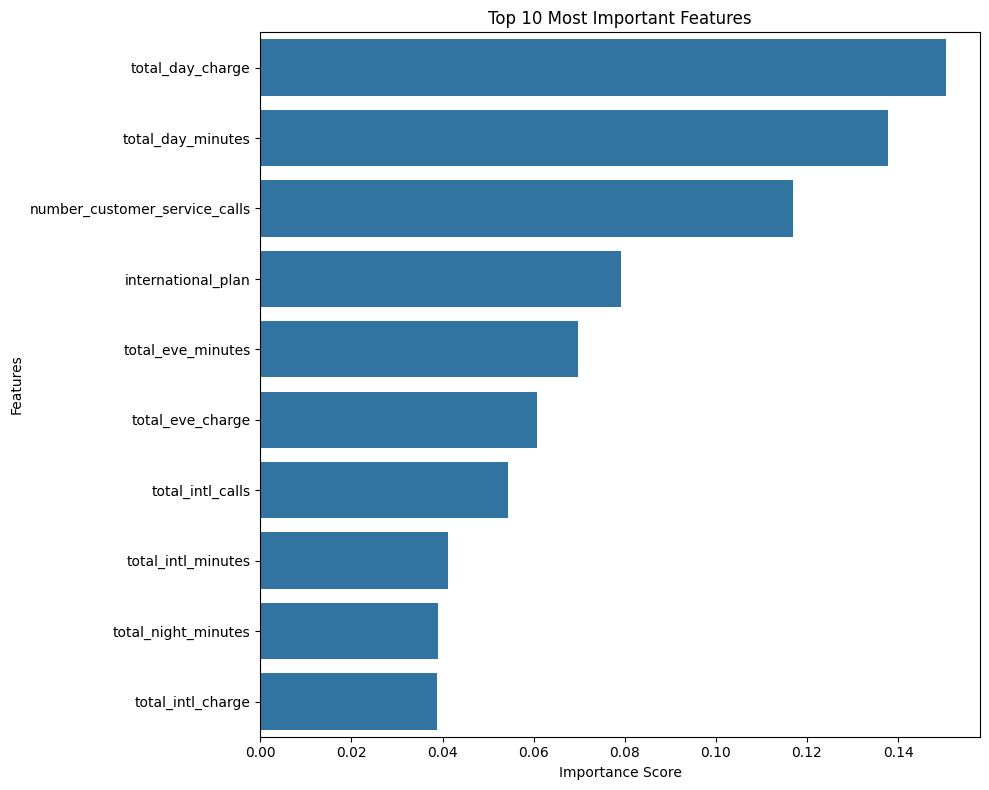

In [25]:
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
top_10_features = feature_importances.nlargest(10)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_features, y=top_10_features.index)
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance.png')

In [26]:
churn_likelihood = model.predict_proba(X_test[:5])[:, 1]
for i, likelihood in enumerate(churn_likelihood):
    print(f"Instance {i+1}: Churn Likelihood = {likelihood:.4f}")

Instance 1: Churn Likelihood = 0.0000
Instance 2: Churn Likelihood = 0.0200
Instance 3: Churn Likelihood = 0.0300
Instance 4: Churn Likelihood = 0.0000
Instance 5: Churn Likelihood = 0.0500
